## 实验题目4 牛顿(Newton)迭代法

### 代码实现

In [23]:
using Printf

In [24]:
# newton method
function newton(f::Function, df::Function, ϵ1, ϵ2, N, x0)
    n = 1
    while n <= N
        F = f(x0)
        DF = df(x0)
        if abs(F) < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x0)
            return
        end
        if abs(DF) < ϵ2
            @printf("Reach a critical point!\n")
            return
        end
        x1 = x0 - F / DF
        Tol = abs(x1 - x0)
        if Tol < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x1)
            return
        end
        n = n + 1
        x0 = x1
    end
    @printf("Fail to converge within %d iterations!\n", N)
end
# multi-root newton method
function newton(f::Function, df::Function, ϵ1, ϵ2, N, x0, λ)
    n = 1
    while n <= N
        F = f(x0)
        DF = df(x0)
        if abs(F) < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x0)
            return
        end
        if abs(DF) < ϵ2
            @printf("Reach a critical point!\n")
            return
        end
        x1 = x0 - λ * F / DF
        Tol = abs(x1 - x0)
        if Tol < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x1)
            return
        end
        n = n + 1
        x0 = x1
    end
    @printf("Fail to converge within %d iterations!\n", N)
end

newton (generic function with 2 methods)

### 问题 1

In [25]:
using Plots

In [26]:
f(x) = cos(x) - x
df(x) = -sin(x) - 1
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.785398163 # pi/4
@time newton(f,df,ϵ1,ϵ2,N,x0)

iter:  2	root:    0.739085178106
  0.011326 seconds (16.97 k allocations: 968.586 KiB, 98.69% compilation time)


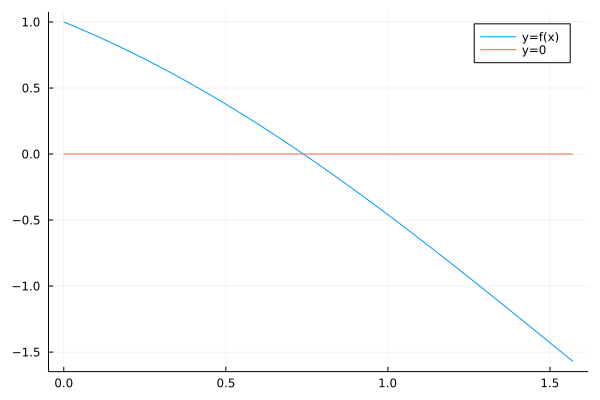

In [27]:
x = range(start=0, stop=pi/2, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
plot(x, y, label=label)

In [28]:
f(x) = exp(-x) - sin(x)
df(x) = -exp(-x) - cos(x)
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.6
@time newton(f,df,ϵ1,ϵ2,N,x0)

iter:  2	root:    0.588532742848
  0.010601 seconds (10.58 k allocations: 577.855 KiB, 98.87% compilation time)


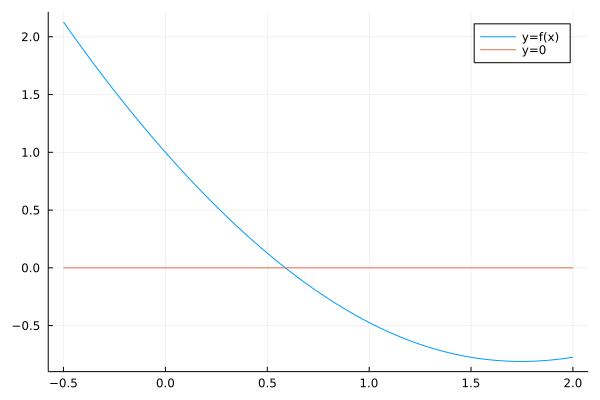

In [29]:
x = range(start=-1/2, stop=2, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
plot(x, y, label=label)

### 问题 2

In [30]:
f(x) = x - exp(-x)
df(x) = 1 + exp(-x)
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.5
@time newton(f,df,ϵ1,ϵ2,N,x0)

iter:  2	root:    0.567143165035
  0.012130 seconds (17.00 k allocations: 968.842 KiB, 99.04% compilation time)


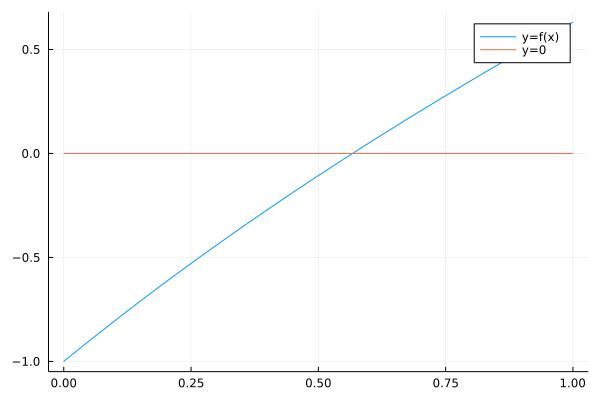

In [31]:
x = range(start=0, stop=1, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
plot(x, y, label=label)

In [32]:
f(x) = x^2 - 2x * exp(-x) + exp(-2x)
# df(x) = 2x - (2exp(-x)-2x*exp(-x)) -2exp(-2x)
df(x) = 2(x - exp(-x)) * (1 + exp(-x))
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 20
x0 = 0.5
λ = 2
@time newton(f, df, ϵ1, ϵ2, N, x0)  # newton method
@time newton(f, df, ϵ1, ϵ2, N, x0, λ)  # multi-root newton method

iter:  7	root:    0.566605704128
  0.013809 seconds (32.86 k allocations: 1.821 MiB, 99.25% compilation time)
iter:  2	root:    0.567143165035
  0.011650 seconds (9.08 k allocations: 481.812 KiB, 99.01% compilation time)


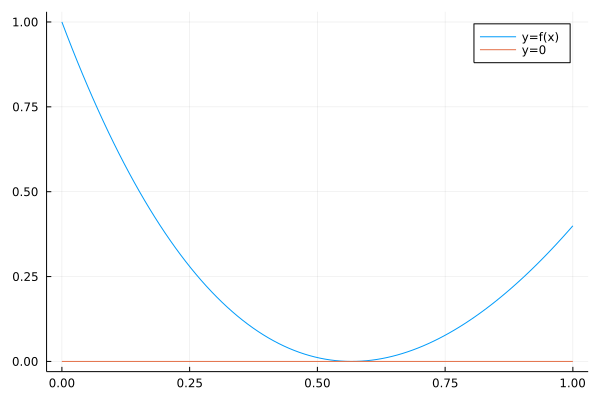

In [33]:
x = range(start=0, stop=1, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
plot(x, y, label=label)

### 思考题

> Todo: 提交前重跑一遍程序然后获得最终的运行时间长度
> 
> Todo: 重新阅读指导书和实验报告完成的要求，写完剩余与代码无关的细节
> 
> Todo: 使用标准库重新计算，检验代码正确性

1. 对问题 1 确定初值的原则是什么？实际计算中应如何解决？

   选择一个有根区间，本例中容易得到
   
   $f(x)=\cos(x)-x$，有$f(0)=1>0,f(\frac{\pi}{2})=-\frac{\pi}{2}<0$，取区间中点即$x=\frac{\pi}{4}$为初值
   
   $f(x)=e^{-x} - \sin(x)$，有$f(0)=1>0,f(1.2)\approx-0.631<0$，同样取区间中点即$x=0.6$为初值
   
   实际计算中，根据其他算法求出多个精度较粗的有根区间，然后使用牛顿法逼近获得较为精确的数值解。

   > 有时，如果能绘制出函数的粗略图像，也能有助于人为确定根所在的区间，而这是我所查找到的资料通常所推荐的做法
   > 
   > https://computingskillset.com/solving-equations/how-to-find-the-initial-guess-in-newtons-method/
   > 
   > https://math.stackexchange.com/questions/743373/how-to-choose-the-starting-point-in-newtons-method
   
   > 而对于更一般的情形，试图通过程序自动化来计算的话，情况会变得更加复杂，涉及到多个领域的研究
   > 
   > https://en.wikipedia.org/wiki/Newton_fractal
   > 
   > [How to find all roots of complex polynomials by Newton’s method](https://link.springer.com/article/10.1007/s002220100149)

   对于我们而言，可能在给定区间直接作出函数图像是最简单最可行的方式。

2. 对问题 2 如何解释在计算中出现的现象？试加以说明

   本例中，
   
   $(1)f_1(x) = x - e^{-x}=0$
   
   $(2)f_2(x) = x^2 - 2xe^{-x} + e^{-2x}=(x - e^{-x})^{2}={f_1}^2(x)=0$
   
   显然，方程(2)在方程(1)的根位置有重根，可以看到直接应用牛顿迭代法计算轮数为7轮，耗时稍微增加，所得精度也低于无重根牛顿迭代法。由理论课知识可知，当存在重根时牛顿迭代法的收敛速度为线性收敛。在后续使用修正的牛顿法可以使收敛速度重新达到平方收敛，耗时几乎与无重根时一致，迭代次数和精度也相同。
   